# Importing Libraries

In [34]:
import tensorflow as tf

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Test set Image Processing

In [41]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

# Loading Model

In [42]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

# Visualising and Performing Prediction on Single image

In [43]:
!pip install opencv-python

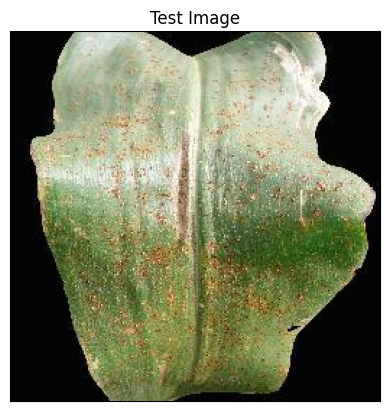

In [46]:
#Test Image Visualization
import cv2
image_path = 'test/test/CornCommonRust2.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

# Testing Model

In [47]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 708ms/step


In [48]:
print(predictions)

[[1.63863875e-23 4.24379819e-28 7.86751242e-27 2.73339389e-28
  6.68443291e-28 7.01788756e-25 3.51283716e-30 4.49223858e-20
  1.00000000e+00 8.68751511e-25 1.12667210e-27 4.29629410e-29
  7.55474910e-27 1.03806450e-29 4.22871052e-33 2.72649810e-29
  3.62850064e-28 2.06430076e-32 6.26722527e-25 1.54019482e-28
  3.37500805e-20 1.65818649e-33 2.59645882e-28 2.76886096e-31
  5.24420332e-31 5.37717431e-31 1.90025576e-27 1.51196605e-29
  1.14274956e-32 7.27343252e-26 1.50064581e-22 2.24577726e-30
  6.20093169e-30 1.68009690e-32 1.29709998e-32 3.92952113e-33
  7.04037718e-35 4.58972506e-28]]


In [49]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

8


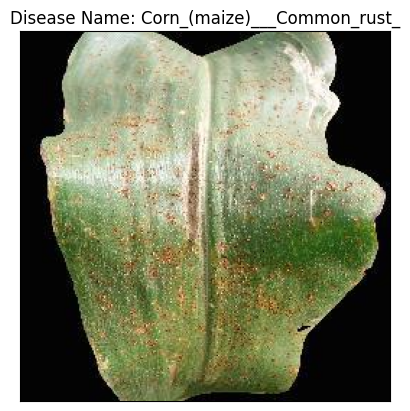

In [50]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()